In [487]:
pip install urlextract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [488]:
pip install xlrd

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [489]:
import numpy as np 
import pandas as pd 
import re
import urlextract
import xlrd


# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
pd.set_option('display.max_colwidth', 1000)

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer


# Check Performance
from sklearn.metrics import classification_report

In [490]:
train = pd.read_excel(r"Youtube_Balenciaga.xlsx")

In [491]:
train.head(18)

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,0,2023-02-24T21:49:40Z,Thank you for this.
1,2.0,NaN,0,2023-02-24T18:56:11Z,"That wasn't an apology, it was one excuse after another."
2,3.0,NaN,0,2023-02-23T00:40:54Z,Those are probably children that are trafficked in the entertainment industry
3,4.0,NaN,0,2023-02-23T00:40:49Z,Those are probably children that are trafficked in the entertainment industry
4,5.0,NaN,0,2023-02-19T13:26:47Z,"Epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash... but let's not go tabloid, Michael. Paedophilia is sexual attraction to prepubescent children and that doesn't describe the girls they used as their play things. \n\nWhat we are seeing in these 'adverts' IS for paedophiles."
5,6.0,NaN,0,2023-02-19T05:21:41Z,"The blind could see there is an evil attack, a demonic war being waged on our minds, hearts and spirits."
6,7.0,NaN,0,2023-02-18T20:09:59Z,"Another thing I found is in one of the child ads thereâ€™s a kids drawing in the background literally depicting satan. There also a folded black satanic robe. And in the same ad, thereâ€™s balenciaga tape. Except on it balenciaga is spelt â€œbaal-enciagaâ€ with the part â€œBaalâ€ facing the camera. And ofc Baal is one of the idols they worshipped in biblical times and was known for child sacrifice. Similar to the child sacrifice we see in todays culture with this over sexualization, abortion, etc. On top of that, similarly how you translated â€œba len ci agaâ€ into Latin and it says â€œdo what you wantâ€ (a known satanic phrase) if you type â€œBaal enci agaâ€ it translates to Baal is king. Theyâ€™re literally not even hiding it anymore because of how normalized itâ€™s become"
7,8.0,NaN,0,2023-02-18T14:54:31Z,They are sorry they got caught
8,9.0,NaN,0,2023-02-17T23:17:16Z,Madeleine McCann used to carry a teddy bear around with her all the time
9,10.0,NaN,0,2023-02-17T19:54:57Z,Wyta. weird sex things is and has always been a right w thing not left. Also I am a centrist Iâ€™m above you all ðŸ‘ˆðŸ‘‰ ðŸ˜‚


In [492]:
train.shape[0]

26530

In [493]:
##Replace 'Text' column to 'Comments'

train.rename(columns = {'Text':'Comments'}, inplace = True)

In [494]:
train.columns

Index(['Comment Number', 'Reply Number', 'Like Count', 'Published At',
       'Comments'],
      dtype='object')

In [495]:
train[train.columns[-1]].count()

26529

In [496]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

       Comment Number  Reply Number  Like Count          Published At Comments
17229          5640.0           NaN           0  2022-11-23T05:49:29Z      NaN


In [497]:
# Drop rows with null values in 'Comments' column
train = train.dropna(subset=['Comments'])

In [498]:
train.shape

(26529, 5)

In [499]:
# Null rows detection

null_rows = train[train['Comments'].isnull()]

print(null_rows)

Empty DataFrame
Columns: [Comment Number, Reply Number, Like Count, Published At, Comments]
Index: []


In [500]:
train['Comments'] = train['Comments'].astype(str)

In [428]:
##train = train.sample(n=18000,replace=True)

In [501]:
train.shape

(26529, 5)

In [502]:
### Create Length Feature

train['text_length'] = train['Comments'].apply(lambda x : len(x))

<AxesSubplot:ylabel='Frequency'>

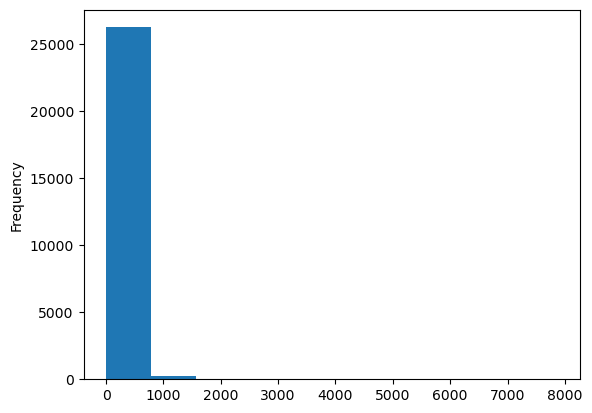

In [503]:
train['text_length'].plot.hist(bins = 10)

In [504]:
# URLs removal and extra spaces too

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [505]:
train.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,0,2023-02-24T21:49:40Z,Thank you for this.,19
1,2.0,NaN,0,2023-02-24T18:56:11Z,"That wasn't an apology, it was one excuse after another.",56
2,3.0,NaN,0,2023-02-23T00:40:54Z,Those are probably children that are trafficked in the entertainment industry,77
3,4.0,NaN,0,2023-02-23T00:40:49Z,Those are probably children that are trafficked in the entertainment industry,77
4,5.0,NaN,0,2023-02-19T13:26:47Z,"Epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash... but let's not go tabloid, Michael. Paedophilia is sexual attraction to prepubescent children and that doesn't describe the girls they used as their play things. \n\nWhat we are seeing in these 'adverts' IS for paedophiles.",331
5,6.0,NaN,0,2023-02-19T05:21:41Z,"The blind could see there is an evil attack, a demonic war being waged on our minds, hearts and spirits.",104
6,7.0,NaN,0,2023-02-18T20:09:59Z,"Another thing I found is in one of the child ads thereâ€™s a kids drawing in the background literally depicting satan. There also a folded black satanic robe. And in the same ad, thereâ€™s balenciaga tape. Except on it balenciaga is spelt â€œbaal-enciagaâ€ with the part â€œBaalâ€ facing the camera. And ofc Baal is one of the idols they worshipped in biblical times and was known for child sacrifice. Similar to the child sacrifice we see in todays culture with this over sexualization, abortion, etc. On top of that, similarly how you translated â€œba len ci agaâ€ into Latin and it says â€œdo what you wantâ€ (a known satanic phrase) if you type â€œBaal enci agaâ€ it translates to Baal is king. Theyâ€™re literally not even hiding it anymore because of how normalized itâ€™s become",790
7,8.0,NaN,0,2023-02-18T14:54:31Z,They are sorry they got caught,30
8,9.0,NaN,0,2023-02-17T23:17:16Z,Madeleine McCann used to carry a teddy bear around with her all the time,72
9,10.0,NaN,0,2023-02-17T19:54:57Z,Wyta. weird sex things is and has always been a right w thing not left. Also I am a centrist Iâ€™m above you all ðŸ‘ˆðŸ‘‰ ðŸ˜‚,126


In [506]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [507]:
train['Comments'].apply(remove_punctuations)

0                                                                                                                                                                                                                                                                                                                        Thank you for this
1                                                                                                                                                                                                                                                                                     That wasnt an apology it was one excuse after another
2                                                                                                                                                                                                                                                             Those are probably children that are trafficked in the entertainment industry
3   

In [508]:
# Commit to Table
train['Comments'] = train['Comments'].apply(remove_punctuations)

<AxesSubplot:ylabel='Frequency'>

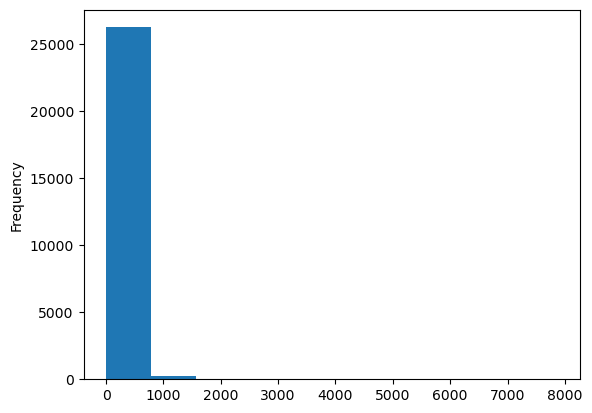

In [509]:
train['text_length'].plot.hist(bins = 10)

In [510]:
# Showing only
train['Comments'].apply(lambda x: x.lower())

0                                                                                                                                                                                                                                                                                                                        thank you for this
1                                                                                                                                                                                                                                                                                     that wasnt an apology it was one excuse after another
2                                                                                                                                                                                                                                                             those are probably children that are trafficked in the entertainment industry
3   

In [511]:
# Commit to Table
train['Comments'] = train['Comments'].apply(lambda x: x.lower())

In [512]:
import nltk
from nltk.tokenize import TweetTokenizer

# Instantiate the TweetTokenizer
tokenizer = TweetTokenizer()

# Define a function to tokenize a tweet
def tokenize_tweet(tweet):
    # Use the TweetTokenizer to tokenize the tweet
    tokens = tokenizer.tokenize(tweet)
    return tokens

# Apply the tokenization function to the 'Comments' column
train['Tokens'] = train['Comments'].apply(tokenize_tweet)

In [513]:
train.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank you for this,19,"[thank, you, for, this]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,that wasnt an apology it was one excuse after another,56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,those are probably children that are trafficked in the entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,those are probably children that are trafficked in the entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein and his group of elitists abused their power and saw the girls they used as nothing more than trash but lets not go tabloid michael paedophilia is sexual attraction to prepubescent children and that doesnt describe the girls they used as their play things \n\nwhat we are seeing in these adverts is for paedophiles,331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,the blind could see there is an evil attack a demonic war being waged on our minds hearts and spirits,104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing i found is in one of the child ads thereâ€™s a kids drawing in the background literally depicting satan there also a folded black satanic robe and in the same ad thereâ€™s balenciaga tape except on it balenciaga is spelt â€œbaalenciagaâ€ with the part â€œbaalâ€ facing the camera and ofc baal is one of the idols they worshipped in biblical times and was known for child sacrifice similar to the child sacrifice we see in todays culture with this over sexualization abortion etc on top of that similarly how you translated â€œba len ci agaâ€ into latin and it says â€œdo what you wantâ€ a known satanic phrase if you type â€œbaal enci agaâ€ it translates to baal is king theyâ€™re literally not even hiding it anymore because of how normalized itâ€™s become,790,"[another, thing, i, found, is, in, one, of, the, child, ads, thereâ, €, ™, s, a, kids, drawing, in, the, background, literally, depicting, satan, there, also, a, folded, black, satanic, robe, and, in, the, same, ad, thereâ, €, ™, s, balenciaga, tape, except, on, it, balenciaga, is, spelt, â, €, œbaalenciagaâ, €, , with, the, part, â, €, œbaalâ, €, , facing, the, camera, and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, abortion, etc, on, ...]"
7,8.0,NaN,0,2023-02-18T14:54:31Z,they are sorry they got caught,30,"[they, are, sorry, they, got, caught]"
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used to carry a teddy bear around with her all the time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things is and has always been a right w thing not left also i am a centrist iâ€™m above you all ðÿ‘ˆðÿ‘‰ ðÿ˜‚,126,"[wyta, weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, also, i, am, a, centrist, iâ, €, ™, m, above, you, all, ðÿ, ‘, ˆðÿ, ‘, ‰, ðÿ, ˜, ‚]"


In [514]:
# Get Stopwords
stop = stopwords.words('english')

In [515]:
# Tokenize and Remove Stop Words
train['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                                                                                                                                                                                                                            [thank]
1                                                                                                                                                                                                             [wasnt, apology, one, excuse, another]
2                                                                                                                                                                                          [probably, children, trafficked, entertainment, industry]
3                                                                                                                                                                                          [probably, children, trafficked, entertainment, industry]
4        [epstein, g

In [516]:
train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                                                                                                                                                                                                 thank
1                                                                                                                                                                                      wasnt apology one excuse another
2                                                                                                                                                                   probably children trafficked entertainment industry
3                                                                                                                                                                   probably children trafficked entertainment industry
4        epstein group elitists abused power saw girls used nothing trash lets go tabloid michael paedophilia sexual attraction prepubes

In [517]:
# Join the words back
train['Comments'] = train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [518]:
train.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank,19,"[thank, you, for, this]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,wasnt apology one excuse another,56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein group elitists abused power saw girls used nothing trash lets go tabloid michael paedophilia sexual attraction prepubescent children doesnt describe girls used play things seeing adverts paedophiles,331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,blind could see evil attack demonic war waged minds hearts spirits,104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing found one child ads thereâ€™s kids drawing background literally depicting satan also folded black satanic robe ad thereâ€™s balenciaga tape except balenciaga spelt â€œbaalenciagaâ€ part â€œbaalâ€ facing camera ofc baal one idols worshipped biblical times known child sacrifice similar child sacrifice see todays culture sexualization abortion etc top similarly translated â€œba len ci agaâ€ latin says â€œdo wantâ€ known satanic phrase type â€œbaal enci agaâ€ translates baal king theyâ€™re literally even hiding anymore normalized itâ€™s become,790,"[another, thing, i, found, is, in, one, of, the, child, ads, thereâ, €, ™, s, a, kids, drawing, in, the, background, literally, depicting, satan, there, also, a, folded, black, satanic, robe, and, in, the, same, ad, thereâ, €, ™, s, balenciaga, tape, except, on, it, balenciaga, is, spelt, â, €, œbaalenciagaâ, €, , with, the, part, â, €, œbaalâ, €, , facing, the, camera, and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, abortion, etc, on, ...]"
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30,"[they, are, sorry, they, got, caught]"
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things always right w thing left also centrist iâ€™m ðÿ‘ˆðÿ‘‰ ðÿ˜‚,126,"[wyta, weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, also, i, am, a, centrist, iâ, €, ™, m, above, you, all, ðÿ, ‘, ˆðÿ, ‘, ‰, ðÿ, ˜, ‚]"


In [519]:
##Remove characters other than emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\u2764"                  # heart symbol
        u"\U0001F644"              # rolling eyes face
        u"\U000024C2-\U0001F251"  # miscellaneous symbols
        u"\U0001f926-\U0001f937"  # people and body-related symbols
        u"\u2600-\u2B55"          # weather-related symbols
        u"\u200d"                 # zero width joiner
        u"\u23cf"                 # eject symbol
        u"\u23e9"                 # fast forward symbol
        u"\u231a"                 # watch symbol
        u"\ufe0f"                 # emoji variation selector
                                  
                           "]+", flags=re.UNICODE)
    text = emoticon_pattern.sub(r' ', text)  # replace emoticons with a space
    text = re.sub(r'[^\w\s]', '', text)  # remove non-word characters except spaces
    return text.strip()

In [520]:

# Apply the remove_emoticons function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_emoticons)

In [521]:
##Remove numbers

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'\d+', '', x))

In [522]:
train.head(500)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank,19,"[thank, you, for, this]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,wasnt apology one excuse another,56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein group elitists abused power saw girls used nothing trash lets go tabloid michael paedophilia sexual attraction prepubescent children doesnt describe girls used play things seeing adverts paedophiles,331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
...,...,...,...,...,...,...,...
495,477.0,NaN,0,2022-12-17T21:45:39Z,many people mention artist sx dolls size shape children gntaps faces,143,"[not, too, many, people, mention, that, artist, with, the, s3x, dolls, the, same, size, and, shape, as, children, only, with, g3ntaps, where, their, faces, should, be]"
496,NaN,20.0,0,2022-12-17T21:46:22Z,working collaboration em something hard find anything,89,"[they, were, working, in, collaboration, with, em, or, something, hard, to, find, anything, on, it, now]"
497,NaN,21.0,0,2022-12-17T21:45:56Z,gntals,13,[g3ntals]
498,478.0,NaN,0,2022-12-17T21:41:31Z,must woke liberal ðÿðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿðÿ¾ðÿ,118,"[they, must, be, woke, and, liberal, ðÿ, ”, ¥, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, , ðÿ, , ¾, ðÿ, ¤, £]"


In [523]:
##Remove non-ASCII improperly encoded characters

def remove_invalid_chars(text):
    # encode the text string using ASCII encoding
    encoded_text = text.encode('ascii', 'ignore')
    # decode the encoded text using ASCII encoding
    decoded_text = encoded_text.decode('ascii')
    return decoded_text

In [524]:
# apply the remove_invalid_chars function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_invalid_chars)


In [525]:
train.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length,Tokens
0,1.0,NaN,0,2023-02-24T21:49:40Z,thank,19,"[thank, you, for, this]"
1,2.0,NaN,0,2023-02-24T18:56:11Z,wasnt apology one excuse another,56,"[that, wasnt, an, apology, it, was, one, excuse, after, another]"
2,3.0,NaN,0,2023-02-23T00:40:54Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
3,4.0,NaN,0,2023-02-23T00:40:49Z,probably children trafficked entertainment industry,77,"[those, are, probably, children, that, are, trafficked, in, the, entertainment, industry]"
4,5.0,NaN,0,2023-02-19T13:26:47Z,epstein group elitists abused power saw girls used nothing trash lets go tabloid michael paedophilia sexual attraction prepubescent children doesnt describe girls used play things seeing adverts paedophiles,331,"[epstein, and, his, group, of, elitists, abused, their, power, and, saw, the, girls, they, used, as, nothing, more, than, trash, but, lets, not, go, tabloid, michael, paedophilia, is, sexual, attraction, to, prepubescent, children, and, that, doesnt, describe, the, girls, they, used, as, their, play, things, what, we, are, seeing, in, these, adverts, is, for, paedophiles]"
5,6.0,NaN,0,2023-02-19T05:21:41Z,blind could see evil attack demonic war waged minds hearts spirits,104,"[the, blind, could, see, there, is, an, evil, attack, a, demonic, war, being, waged, on, our, minds, hearts, and, spirits]"
6,7.0,NaN,0,2023-02-18T20:09:59Z,another thing found one child ads theres kids drawing background literally depicting satan also folded black satanic robe ad theres balenciaga tape except balenciaga spelt baalenciaga part baal facing camera ofc baal one idols worshipped biblical times known child sacrifice similar child sacrifice see todays culture sexualization abortion etc top similarly translated ba len ci aga latin says do want known satanic phrase type baal enci aga translates baal king theyre literally even hiding anymore normalized its become,790,"[another, thing, i, found, is, in, one, of, the, child, ads, thereâ, €, ™, s, a, kids, drawing, in, the, background, literally, depicting, satan, there, also, a, folded, black, satanic, robe, and, in, the, same, ad, thereâ, €, ™, s, balenciaga, tape, except, on, it, balenciaga, is, spelt, â, €, œbaalenciagaâ, €, , with, the, part, â, €, œbaalâ, €, , facing, the, camera, and, ofc, baal, is, one, of, the, idols, they, worshipped, in, biblical, times, and, was, known, for, child, sacrifice, similar, to, the, child, sacrifice, we, see, in, todays, culture, with, this, over, sexualization, abortion, etc, on, ...]"
7,8.0,NaN,0,2023-02-18T14:54:31Z,sorry got caught,30,"[they, are, sorry, they, got, caught]"
8,9.0,NaN,0,2023-02-17T23:17:16Z,madeleine mccann used carry teddy bear around time,72,"[madeleine, mccann, used, to, carry, a, teddy, bear, around, with, her, all, the, time]"
9,10.0,NaN,0,2023-02-17T19:54:57Z,wyta weird sex things always right w thing left also centrist im,126,"[wyta, weird, sex, things, is, and, has, always, been, a, right, w, thing, not, left, also, i, am, a, centrist, iâ, €, ™, m, above, you, all, ðÿ, ‘, ˆðÿ, ‘, ‰, ðÿ, ˜, ‚]"


In [526]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [527]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srishti.Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [528]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Srishti.Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srishti.Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [529]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [530]:
nltk.download('omw-1.4')

# Lemmatize
train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Srishti.Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                                                                                                                                                                                                                 thank
1                                                                                                                                                                                      wasnt apology one excuse another
2                                                                                                                                                                   probably children trafficked entertainment industry
3                                                                                                                                                                   probably children trafficked entertainment industry
4        epstein group elitists abused power saw girls used nothing trash lets go tabloid michael paedophilia sexual attraction prepubes

In [531]:
# Commit to Table

train['Comments'] = train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

In [532]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Srishti.Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Srishti.Sharma\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [533]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [534]:
# Apply the POS tagging function to the 'Comments' column
train['POS_Tagged'] = train['Comments'].apply(pos_tagging)

In [535]:
train['POS_Tagged']

0                                                                                                                                                                                                                                                                                                                                                                                                                              [(thank, NN)]
1                                                                                                                                                                                                                                                                                                                                                                       [(wasnt, NN), (apology, NN), (one, CD), (excuse, NN), (another, DT)]
2                                                                                                                                             

In [536]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable


In [537]:
import pandas as pd
from textblob import TextBlob
import gensim.downloader as api

In [538]:
import gensim.downloader as api

# Load the GloVe model
glove_model = api.load('glove-wiki-gigaword-100')

import re

def clean_text(text):
    text = str(text)
    # Remove any URLs
    text = re.sub(r'http\S+', '', text)
    # Remove any user mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove any non-word character and extra whitespaces
    text = re.sub(r'[^\w\s]', '', text).strip()
    # Convert to lowercase
    text = text.lower()
    return text

train['cleaned_comments'] = train['Comments'].apply(clean_text)

In [539]:
# Clean the comments
train['cleaned_comments'] = train['Comments'].apply(clean_text)

In [540]:
# Create word embeddings for each comment
def create_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in glove_model:
            embeddings.append(glove_model[word])
    return embeddings

train['embeddings'] = train['cleaned_comments'].apply(create_embeddings)

In [541]:
# Calculate the sentiment score for each comment
def calculate_sentiment_score(text):
    return TextBlob(text).sentiment.polarity

train['sentiment_score'] = train['cleaned_comments'].apply(calculate_sentiment_score)

In [542]:
# Calculate the polarity scores and sentiment tags
polarity = [TextBlob(comment).sentiment.polarity for comment in train['Comments']]
sentiment = ['positive' if score > 0 else 'negative'  for score in polarity]

In [543]:
# Add the new columns to the train DataFrame
train['polarity'] = polarity
train['sentiment'] = sentiment

In [544]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26529 entries, 0 to 26529
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Comment Number    21265 non-null  float64
 1   Reply Number      5264 non-null   float64
 2   Like Count        26529 non-null  int64  
 3   Published At      26529 non-null  object 
 4   Comments          26529 non-null  object 
 5   text_length       26529 non-null  int64  
 6   Tokens            26529 non-null  object 
 7   POS_Tagged        26529 non-null  object 
 8   cleaned_comments  26529 non-null  object 
 9   embeddings        26529 non-null  object 
 10  sentiment_score   26529 non-null  float64
 11  polarity          26529 non-null  float64
 12  sentiment         26529 non-null  object 
dtypes: float64(4), int64(2), object(7)
memory usage: 2.8+ MB


In [545]:
# Count the number of comments for each sentiment
train['sentiment'].value_counts()


negative    18625
positive     7904
Name: sentiment, dtype: int64

In [546]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler
from sklearn.linear_model import LinearRegression

In [547]:
def create_embeddings(text):
    embeddings = []
    for word in text.split():
        if word in glove_model:
            embeddings.append(glove_model[word])
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)

In [548]:
X = train["Comments"].apply(create_embeddings).to_numpy()
y = train["sentiment"].to_numpy()

In [549]:
# Reshape the data to have shape (n_samples, n_features)
X = X.reshape(X.shape[0], -1)

In [550]:
X = X.reshape(-1) 

In [551]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

X = np.apply_along_axis(lambda x: str(x[0]), axis=1, arr=X.reshape(-1,1))

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(X.ravel())

X = X.astype(np.float64)


In [552]:
from sklearn.preprocessing import StandardScaler

# Normalize the data using StandardScaler
scaler = StandardScaler(with_mean=False)
X = scaler.fit_transform(X)


In [553]:
# Ensure that the data has a data type of float64
X = X.astype(np.float64)

In [554]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [555]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(21223, 1738563)
(5306, 1738563)
(21223,)
(5306,)


In [556]:
X_train.shape[0]

21223

In [557]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Convert the y vector into a matrix of one-hot encoded labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y_encoded.reshape(-1, 1))

In [558]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score

# Use the same X and y shapes
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=100)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Logistic Regression Accuracy:", accuracy)
print("Logistic Regression F1 score:", f1)


Logistic Regression Accuracy: 0.7227666792310592
Logistic Regression F1 score: 0.6213957491857748


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [560]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2

# Apply chi-square test to select top 1000 features
k = 1000
chi_selector = SelectKBest(chi2, k=k)
X_train_chi = chi_selector.fit_transform(X_train, y_train)
X_test_chi = chi_selector.transform(X_test)

# Train an SVM model with the selected features
svm = SVC(kernel='rbf',random_state=42)
svm.fit(X_train_chi, y_train)

# Evaluate the model
svm_pred = svm.predict(X_test_chi)
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred, average='micro')
print("SVM accuracy score:", svm_acc)
print("SVM F1 score:", svm_f1)

SVM accuracy score: 0.7148511119487373
SVM F1 score: 0.7148511119487373
